Robust PCA
==========

This example demonstrates the use of class [rpca.RobustPCA](http://sporco.rtfd.org/en/latest/modules/sporco.admm.rpca.html#sporco.admm.rpca.RobustPCA) for video foreground/background separation via Robust PCA, the low-rank component representing the static background and the sparse component representing the moving foreground.

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import numpy as np
import imageio

from sporco.admm import rpca
from sporco import metric
from sporco import util
from sporco import plot
plot.config_notebook_plotting()

Load example video.

In [2]:
reader = imageio.get_reader('imageio:newtonscradle.gif')
nfrm = reader.get_length()
frmlst = []
for i, frm in enumerate(reader):
    frmlst.append(util.rgb2gray(frm[..., 0:3].astype(np.float32)/255.0))
v = np.stack(frmlst, axis=2)

Construct matrix with each column consisting of a vectorised video frame.

In [3]:
S = v.reshape((-1, v.shape[-1]))

Set options for the Robust PCA solver, create the solver object, and solve, returning the estimates of the low rank and sparse components ``X`` and ``Y``. Unlike most other SPORCO classes for optimisation problems, [rpca.RobustPCA](http://sporco.rtfd.org/en/latest/modules/sporco.admm.rpca.html#sporco.admm.rpca.RobustPCA) has a meaningful default regularization parameter, as used here.

In [4]:
opt = rpca.RobustPCA.Options({'Verbose': True, 'gEvalY': False,
                              'MaxMainIter': 200, 'RelStopTol': 1e-3,
                              'AutoRho': {'Enabled': True}})
b = rpca.RobustPCA(S, None, opt)
X, Y = b.solve()

Itn   Fnc       NrmNuc    Nrmℓ1     Cnstr     r         s         ρ       
--------------------------------------------------------------------------
   0  9.20e+02  8.37e+02  1.45e+04  1.63e+01  1.97e-02  1.39e+00  1.12e-01
   1  9.23e+02  8.51e+02  1.26e+04  1.20e+01  1.44e-02  7.97e-01  1.12e-01


   2  1.06e+03  7.95e+02  4.66e+04  4.34e+01  5.24e-02  1.66e-01  1.50e-02
   3  1.19e+03  8.73e+02  5.52e+04  5.15e+01  5.90e-02  9.46e-02  8.44e-03
   4  1.08e+03  7.85e+02  5.10e+04  4.75e+01  5.74e-02  5.43e-02  6.67e-03
   5  1.08e+03  8.58e+02  3.91e+04  3.54e+01  4.13e-02  4.85e-02  6.67e-03
   6  9.84e+02  8.06e+02  3.07e+04  2.60e+01  3.14e-02  3.36e-02  6.67e-03
   7  9.79e+02  8.42e+02  2.38e+04  1.86e+01  2.21e-02  2.65e-02  6.67e-03
   8  9.27e+02  8.17e+02  1.92e+04  1.33e+01  1.61e-02  2.28e-02  6.67e-03


   9  9.30e+02  8.34e+02  1.66e+04  1.09e+01  1.31e-02  1.62e-02  5.60e-03
  10  9.05e+02  8.23e+02  1.43e+04  8.28e+00  1.00e-02  1.16e-02  5.04e-03
  11  9.02e+02  8.33e+02  1.20e+04  6.12e+00  7.38e-03  9.92e-03  5.04e-03
  12  8.93e+02  8.30e+02  1.09e+04  5.00e+00  6.05e-03  7.03e-03  4.34e-03
  13  8.90e+02  8.33e+02  9.92e+03  4.21e+00  5.09e-03  5.26e-03  4.34e-03
  14  8.88e+02  8.33e+02  9.52e+03  3.80e+00  4.59e-03  4.08e-03  4.34e-03
  15  8.86e+02  8.32e+02  9.35e+03  3.53e+00  4.27e-03  3.45e-03  4.34e-03


  16  8.86e+02  8.32e+02  9.29e+03  3.34e+00  4.03e-03  3.27e-03  4.83e-03
  17  8.85e+02  8.32e+02  9.28e+03  3.17e+00  3.84e-03  3.25e-03  5.37e-03
  18  8.85e+02  8.32e+02  9.27e+03  3.04e+00  3.68e-03  2.85e-03  5.37e-03
  19  8.85e+02  8.32e+02  9.24e+03  2.92e+00  3.52e-03  3.05e-03  6.10e-03
  20  8.85e+02  8.32e+02  9.19e+03  2.80e+00  3.38e-03  2.88e-03  6.10e-03
  21  8.85e+02  8.32e+02  9.14e+03  2.67e+00  3.23e-03  2.79e-03  6.10e-03
  22  8.85e+02  8.32e+02  9.09e+03  2.55e+00  3.09e-03  2.67e-03  6.10e-03


  23  8.85e+02  8.32e+02  9.05e+03  2.43e+00  2.94e-03  2.56e-03  6.10e-03
  24  8.85e+02  8.32e+02  9.03e+03  2.31e+00  2.80e-03  2.44e-03  6.10e-03
  25  8.85e+02  8.32e+02  9.02e+03  2.20e+00  2.66e-03  2.33e-03  6.10e-03
  26  8.84e+02  8.32e+02  9.01e+03  2.09e+00  2.53e-03  2.24e-03  6.10e-03
  27  8.84e+02  8.32e+02  9.01e+03  1.99e+00  2.41e-03  2.13e-03  6.10e-03
  28  8.84e+02  8.32e+02  9.00e+03  1.90e+00  2.29e-03  1.99e-03  6.10e-03
  29  8.84e+02  8.32e+02  8.99e+03  1.81e+00  2.19e-03  1.85e-03  6.10e-03
  30  8.84e+02  8.32e+02  8.98e+03  1.73e+00  2.09e-03  1.77e-03  6.10e-03


  31  8.84e+02  8.32e+02  8.96e+03  1.65e+00  1.99e-03  1.64e-03  6.10e-03
  32  8.84e+02  8.32e+02  8.95e+03  1.57e+00  1.90e-03  1.72e-03  6.72e-03
  33  8.84e+02  8.32e+02  8.93e+03  1.50e+00  1.81e-03  1.68e-03  6.72e-03
  34  8.84e+02  8.33e+02  8.91e+03  1.43e+00  1.73e-03  1.58e-03  6.72e-03
  35  8.84e+02  8.33e+02  8.90e+03  1.37e+00  1.65e-03  1.49e-03  6.72e-03
  36  8.84e+02  8.33e+02  8.89e+03  1.31e+00  1.58e-03  1.40e-03  6.72e-03
  37  8.84e+02  8.33e+02  8.88e+03  1.25e+00  1.51e-03  1.33e-03  6.72e-03
  38  8.84e+02  8.33e+02  8.87e+03  1.19e+00  1.44e-03  1.26e-03  6.72e-03


  39  8.84e+02  8.33e+02  8.86e+03  1.14e+00  1.37e-03  1.20e-03  6.72e-03
  40  8.84e+02  8.33e+02  8.85e+03  1.09e+00  1.31e-03  1.16e-03  6.72e-03
  41  8.84e+02  8.33e+02  8.85e+03  1.04e+00  1.25e-03  1.09e-03  6.72e-03
  42  8.84e+02  8.33e+02  8.84e+03  9.92e-01  1.20e-03  1.03e-03  6.72e-03
  43  8.84e+02  8.33e+02  8.84e+03  9.47e-01  1.14e-03  9.89e-04  6.72e-03
  44  8.84e+02  8.33e+02  8.83e+03  9.06e-01  1.10e-03  9.28e-04  6.72e-03
  45  8.84e+02  8.33e+02  8.82e+03  8.64e-01  1.04e-03  9.01e-04  6.72e-03
  46  8.84e+02  8.33e+02  8.81e+03  8.30e-01  1.00e-03  8.30e-04  6.72e-03


  47  8.84e+02  8.33e+02  8.81e+03  7.99e-01  9.66e-04  8.17e-04  7.39e-03
--------------------------------------------------------------------------


Display solve time.

In [5]:
print("RobustPCA solve time: %5.2f s" % b.timer.elapsed('solve'))

RobustPCA solve time:  1.54 s


Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

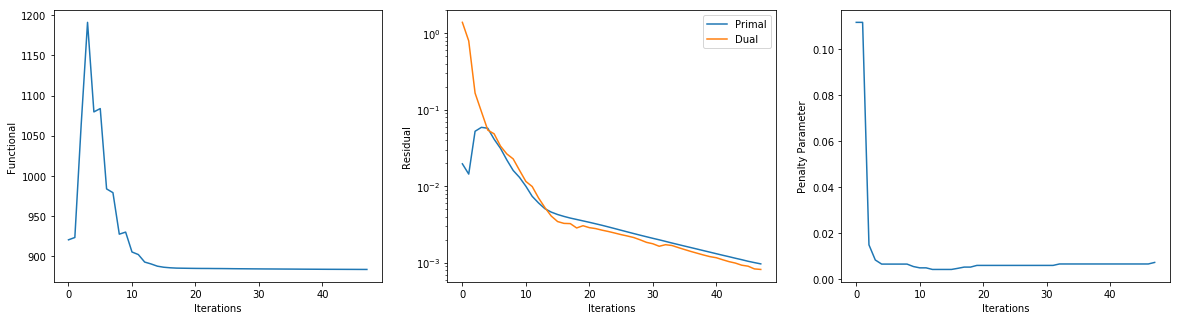

In [6]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()

Reshape low-rank component ``X`` as background video sequence and sparse component ``Y`` as foreground video sequence.

In [7]:
vbg = X.reshape(v.shape)
vfg = Y.reshape(v.shape)

Display original video frames and corresponding background and foreground frames.

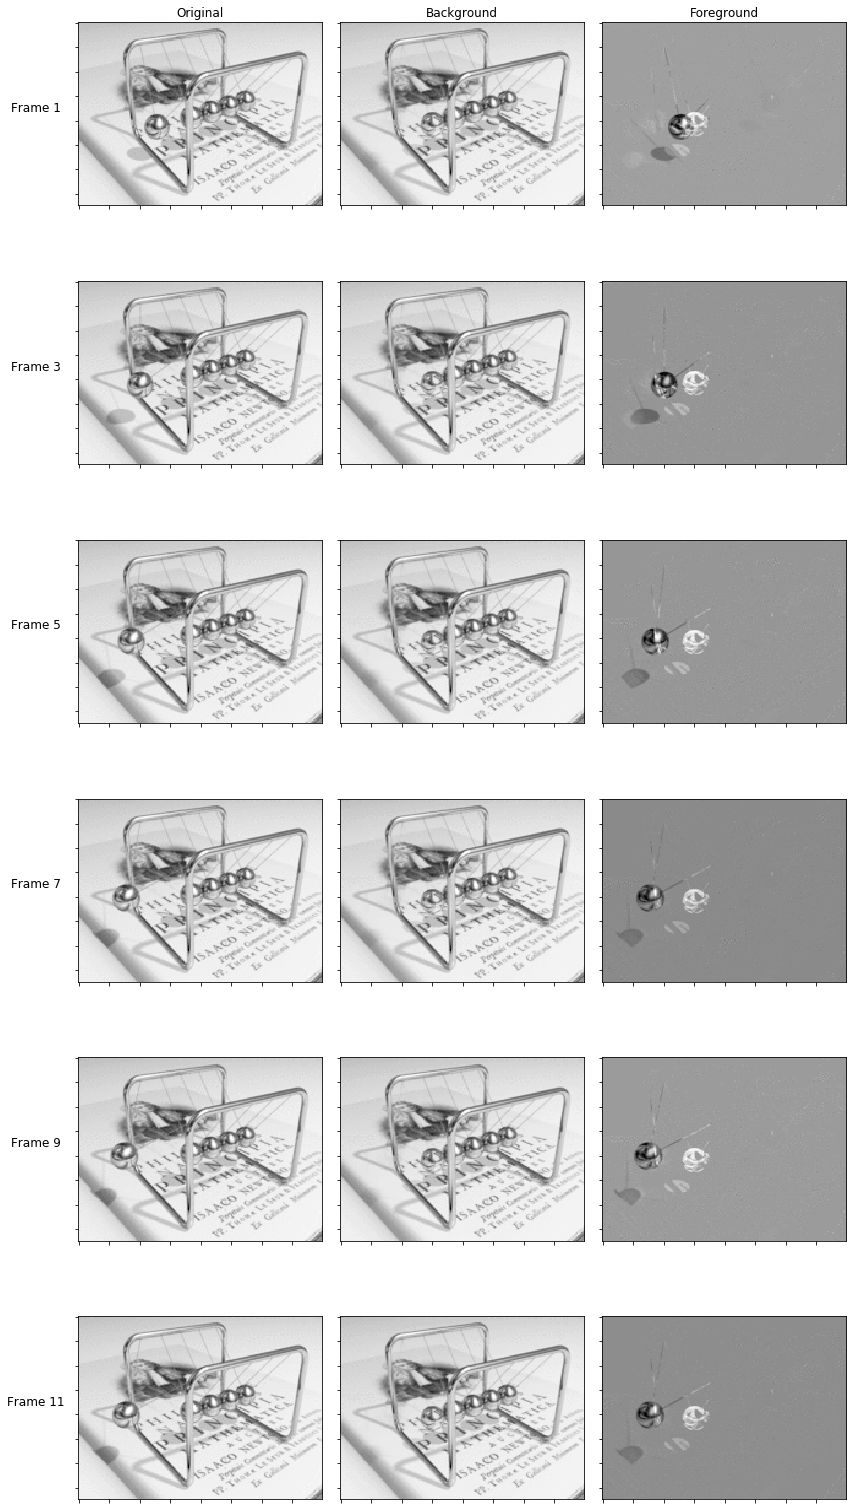

In [8]:
fig, ax = plot.subplots(nrows=6, ncols=3, figsize=(12, 22))
ax[0][0].set_title("Original")
ax[0][1].set_title("Background")
ax[0][2].set_title("Foreground")
for n, fn in enumerate(range(1, 13, 2)):
    plot.imview(v[..., fn], fig=fig, ax=ax[n][0])
    plot.imview(vbg[..., fn], fig=fig, ax=ax[n][1])
    plot.imview(vfg[..., fn], fig=fig, ax=ax[n][2])
    ax[n][0].set_ylabel("Frame %d" % fn, labelpad=35, rotation=0, size='large')
fig.tight_layout()
fig.show()